**Mnist Dataset** :
   - It's a dataset of hand-written digits, 0 through 9.
   -  It's 28x28 pixels images of these hand-written digits. 
   - So we convert it into 28*28 = 784 , and that will be our input layer

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load dataset
from tensorflow.keras import datasets

In [4]:
# scaling the data to be between 0 and 1
from tensorflow.keras.utils import normalize

In [5]:
from tensorflow.keras.models import Sequential

In [6]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [7]:
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve

## Load Dataset

In [8]:
(X_train ,y_train) ,(X_test ,y_test) = datasets.mnist.load_data()

In [9]:
print("X_train Shape : ",X_train.shape)
print("X_test Shape  : ",X_test.shape)

print("y_train Shape : ",y_train.shape)
print("y_test Shape  : ",y_test.shape)

X_train Shape :  (60000, 28, 28)
X_test Shape  :  (10000, 28, 28)
y_train Shape :  (60000,)
y_test Shape  :  (10000,)


In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

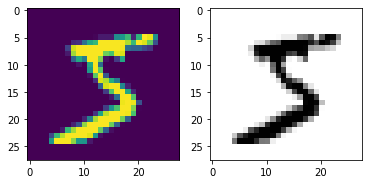

In [11]:
plt.subplot(1,2,1)
plt.imshow(X_train[0])

plt.subplot(1,2,2)
plt.imshow(X_train[0],cmap=plt.cm.binary)

**Data varies from 0 to 255 , so we normalize(scale) it.**

In [12]:
X_train = normalize(X_train ,axis=1)
X_test  = normalize(X_test  ,axis=1)

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

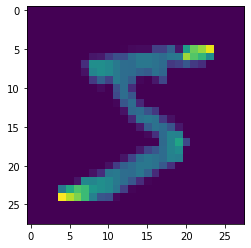

In [14]:
plt.imshow(X_train[0])

In [15]:
X_train.shape

(60000, 28, 28)

- We want our input layer to look like (6000,28*28)
- So, we flatten our image

## Data Preperation

In [16]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened  = X_test.reshape(len(X_test), 28*28)

In [17]:
X_train_flattened.shape

(60000, 784)

## Model Preperation

In [18]:
# A feed forward model.
model = Sequential()

In [19]:
# model.add(Flatten())

In [20]:
model.add(
           Dense(
                  128 ,
                  input_shape=X_train_flattened.shape[1:],
                  activation='relu'
                 )
          )

In [21]:
model.add(Dense(128 ,activation='relu'))

In [22]:
no_output_classes = 10
model.add(Dense(no_output_classes ,activation='softmax'))

In [23]:
#model.summary()

In [24]:
model.compile(
                optimizer = 'adam', 
                loss      = 'sparse_categorical_crossentropy',
                metrics   = ['accuracy']
             )

In [25]:
model_history = model.fit(
                           X_train_flattened ,y_train ,
                           validation_data = (X_test_flattened,y_test) ,
                           epochs=5
                         )

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2621 - accuracy: 0.9240 - val_loss: 0.1265 - val_accuracy: 0.9611
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1081 - accuracy: 0.9667 - val_loss: 0.1164 - val_accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0735 - accuracy: 0.9768 - val_loss: 0.0835 - val_accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0543 - accuracy: 0.9827 - val_loss: 0.1038 - val_accuracy: 0.9670
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0894 - val_accuracy: 0.9739


In [26]:
y_pred = model.predict(X_test_flattened)
y_pred = [np.argmax(i) for i in y_pred]

In [27]:
y_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 7,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 5,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [28]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [29]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}%".format(acc*100) )

Accuracy : 97.39%


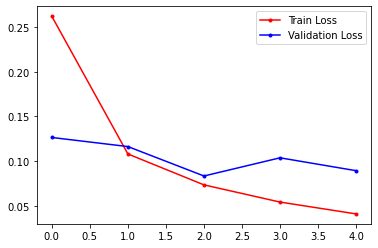

In [30]:
training_loss   = model_history.history['loss']
validation_loss = model_history.history['val_loss']


plt.plot(training_loss ,color='red' ,marker='.' ,label='Train Loss')
plt.plot(validation_loss ,color='blue' ,marker='.' ,label='Validation Loss')

plt.legend()